# Start Here: A Gentle Introduction - Second Try

## 1. Imports

In [1]:
# Îç∞Ïù¥ÌÑ∞ Ï°∞Ïûë
import numpy as np
import pandas as pd

# Ïπ¥ÌÖåÍ≥†Î¶¨Ìòï ÌîºÏ≤ò Ï≤òÎ¶¨
from sklearn.preprocessing import LabelEncoder

# ÌååÏùº Í¥ÄÎ¶¨
import os

# Í≤ΩÍ≥† Ï†úÏô∏
import warnings
warnings.filterwarnings('ignore')

# Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Read in Data
ÌäúÌÜ†Î¶¨ÏñºÏùÑ ÏúÑÌï¥ *application_train.csv*, *application_test.csv*, *submission.csv*Îßå ÏÇ¨Ïö©ÌïúÎã§.

In [2]:
print(os.listdir('../data/'))

['application_test.csv', 'application_train.csv', 'baseline_lgb_1.csv', 'baseline_lgb_2.csv', 'baseline_lgb_domain_features_1.csv', 'baseline_lgb_domain_features_2.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'log_reg_baseline_1.csv', 'log_reg_baseline_2.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'random_forest_baseline_1.csv', 'random_forest_baseline_2.csv', 'random_forest_baseline_domain_1.csv', 'random_forest_baseline_domain_2.csv', 'random_forest_baseline_engineered_1.csv', 'random_forest_baseline_engineered_2.csv', 'sample_submission.csv']


In [3]:
# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞
app_train = pd.read_csv('../data/application_train.csv')
print('ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ :', app_train.shape)
app_train.head()

ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ : (307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞
app_test = pd.read_csv('../data/application_test.csv')
print('ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞ :', app_test.shape)
app_test.head()

ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞ : (48744, 121)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Îäî `TARGET`ÏùÑ Ìè¨Ìï®Ìï¥ 122Í∞úÏùò ÌîºÏ≤ò(feature)Î•º Í∞ñÍ≥† ÏûàÏúºÎ©∞ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Îäî ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î≥¥Îã§ Îç∞Ïù¥ÌÑ∞ ÏñëÏù¥ Ï†ÅÍ≥† `TARGET`ÏùÑ Ï†úÏô∏Ìïú 121Í∞úÏùò ÌîºÏ≤òÎ•º Í∞ñÍ≥† ÏûàÎã§.

## 3. Exploratory Data Analysis

### 3.1. Examine the Distribution of the Target Column

In [5]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

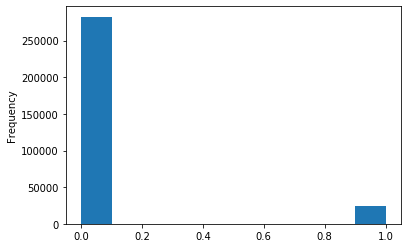

In [6]:
app_train['TARGET'].astype(int).plot.hist()

ÎåÄÏ∂ú ÎØ∏ÏÉÅÌôòÎ≥¥Îã§ ÎåÄÏ∂ú ÏÉÅÌôòÏù∏ Í≤ΩÏö∞Í∞Ä Îçî ÎßéÏùÄ Í≤ÉÏúºÎ°ú Î≥¥ÏïÑ **ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Î¨∏Ï†ú(imbalanced class problem)**Ïù¥ ÏûàÏùåÏùÑ Ïïå Ïàò ÏûàÎã§.

### 3.2. Examine Missing Values

In [7]:
# Í≤∞Ï∏°Ïπò ÎπÑÏú® Í≥ÑÏÇ∞
def missing_values_table(df):
    mis_val = df.isnull().sum()               # Í≤∞Ï∏°Ïπò Í∞úÏàò
    mis_val_perc = 100 * mis_val / len(df)    # Í≤∞Ï∏°Ïπò ÎπÑÏú®

    # Í≤∞Ï∏°Ïπò Í∞úÏàòÏôÄ Í≤∞Ï∏°Ïπò ÎπÑÏú®Î°ú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
    mis_val_table = pd.concat([mis_val, mis_val_perc], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'missing values', 1: '% of total values'})

    # Í≤∞Ï∏°Ïπò ÎπÑÏú®ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ïó≠Ï†ïÎ†¨
    # 1. Í≤∞Ï∏°Ïπò ÎπÑÏú® Ïª¨ÎüºÎßå Ï∂îÏ∂ú
    # 2. Ìï¥Îãπ Ïª¨ÎüºÏùÑ Ïó≠ÏúºÎ°ú Ï†ïÎ†¨
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values('% of total values', ascending=False).round(1)

    # Í≤∞Í≥º Ï∂úÎ†•
    print('Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÄ Ï¥ù {}Í∞úÏùò ÌîºÏ≤òÎ•º Í∞ÄÏßÑÎã§.'.format(df.shape[1]))
    print('{}Í∞úÏùò ÌîºÏ≤ò Ï§ë {}Í∞úÏùò ÌîºÏ≤òÍ∞Ä Í≤∞Ï∏°ÏπòÎ•º Í∞ÄÏßÑÎã§.'.format(
        df.shape[1], mis_val_table_ren_columns.shape[0]))
    
    return mis_val_table_ren_columns

In [8]:
missing_values = missing_values_table(app_train)
missing_values.head(30)

Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÄ Ï¥ù 122Í∞úÏùò ÌîºÏ≤òÎ•º Í∞ÄÏßÑÎã§.
122Í∞úÏùò ÌîºÏ≤ò Ï§ë 67Í∞úÏùò ÌîºÏ≤òÍ∞Ä Í≤∞Ï∏°ÏπòÎ•º Í∞ÄÏßÑÎã§.


missing values  % of total values
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_AVG                    214865               69.9
COMMONAREA_MODE                   214865               69.9
NONLIVINGAPARTMENTS_MEDI          213514               69.4
NONLIVINGAPARTMENTS_MODE          213514               69.4
NONLIVINGAPARTMENTS_AVG           213514               69.4
FONDKAPREMONT_MODE                210295               68.4
LIVINGAPARTMENTS_MODE             210199               68.4
LIVINGAPARTMENTS_MEDI             210199               68.4
LIVINGAPARTMENTS_AVG              210199               68.4
FLOORSMIN_MODE                    208642               67.8
FLOORSMIN_MEDI                    208642               67.8
FLOORSMIN_AVG                     208642               67.8
YEARS_BUILD_MODE                  204488               66.5
YEARS_BUILD_MEDI                  204488               66.5
YEARS_BUILD_AVG                   204488               66.5
OWN_CAR_AGE                       202929               66.0
LANDAREA_AVG                      182590               59.4
LANDAREA_MEDI                     182590               59.4
LANDAREA_MODE                     182590               59.4
BASEMENTAREA_MEDI                 179943               58.5
BASEMENTAREA_AVG                  179943               58.5
BASEMENTAREA_MODE                 179943               58.5
EXT_SOURCE_1                      173378               56.4
NONLIVINGAREA_MEDI                169682               55.2
NONLIVINGAREA_MODE                169682               55.2
NONLIVINGAREA_AVG                 169682               55.2
ELEVATORS_MEDI                    163891               53.3
ELEVATORS_MODE                    163891               53.3
ELEVATORS_AVG                     163891               53.3

Î™®Îç∏ÏùÑ ÎßåÎì§Í∏∞ Ï†ÑÏóê Í≤∞Ï∏°ÏπòÎ•º ÌôïÏù∏ÌïòÍ≥† Í≤∞Ï∏°Ïπò ÌòπÏùÄ Í≤∞Ï∏°ÏπòÎ•º Í∞ÄÏßÄÍ≥† ÏûàÎäî ÌîºÏ≤òÎ•º Ï≤òÎ¶¨Ìï¥Ï§òÏïº ÌïúÎã§.
* **Í≤∞Ï∏°Ïπò ÎåÄÏ≤¥(Imputation)** : Í≤∞Ï∏°ÏπòÎ•º Îã§Î•∏ Í∞íÏúºÎ°ú ÎåÄÏ≤¥ÌïòÎäî Î∞©Î≤ï
* **ÌîºÏ≤ò Ï†úÍ±∞(Deletion)** : Í≤∞Ï∏°Ïπò ÎπÑÏú®Ïù¥ ÎÜíÏùÄ ÌîºÏ≤òÎ•º ÎìúÎ°≠(drop)ÌïòÎäî Î∞©Î≤ï

### 3.3. Column Types

In [9]:
# ÏûêÎ£åÌòï Î≥Ñ ÌîºÏ≤òÏùò Í∞úÏàò
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

Î≥¥ÌÜµ `int64`ÎÇò `float64`Îäî Ïà´ÏûêÌòï Îç∞Ïù¥ÌÑ∞(numerical)Ïù¥Í≥† Ïù¥ÏÇ∞Ï†Å(discrete)ÌïòÍ±∞ÎÇò Ïó∞ÏÜçÏ†Å(continous)ÌïòÎã§.    
Î∞òÎ©¥ `object`Îäî Î¨∏ÏûêÏó¥ÏùÑ Ìè¨Ìï®Ìïú Ïπ¥ÌÖåÍ≥†Î¶¨Ìòï Îç∞Ïù¥ÌÑ∞(categorical)Ïù¥Îã§.

In [10]:
# Ïπ¥ÌÖåÍ≥†Î¶¨Ìòï ÌîºÏ≤òÏùò Í≥†Ïú†Í∞í(unique value) Í∞úÏàò 
app_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

ÎåÄÎ∂ÄÎ∂ÑÏùò Ïπ¥ÌÖåÍ≥†Î¶¨Ìòï ÌîºÏ≤òÍ∞Ä **ÎπÑÍµêÏ†Å Ï†ÅÏùÄ ÏàòÏùò Í≥†Ïú†Í∞í**ÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎã§.    
ÌïòÏßÄÎßå Ïπ¥ÌÖåÍ≥†Î¶¨Ìòï ÌîºÏ≤òÎäî Ïà´ÏûêÌòïÏù¥ ÏïÑÎãàÍ∏∞ ÎïåÎ¨∏Ïóê Î™®Îç∏ ÌïôÏäµ Ï†Ñ Ï≤òÎ¶¨Î•º Ìï¥Ï§òÏïºÌïúÎã§. 

### 3.4. Encoding Categorical Variables
*LightGBM*Í∞ôÏùÄ Î™áÎ™á Î™®Îç∏ÏùÑ Ï†úÏô∏ÌïòÍ≥† ÎåÄÎ∂ÄÎ∂ÑÏùò Î®∏Ïã†Îü¨Îãù Î™®Îç∏ÏùÄ Ïπ¥ÌÖåÍ≥†Î¶¨Ìòï Î≥ÄÏàòÎ•º Ï≤òÎ¶¨Ìï† Ïàò ÏóÜÎã§. Í∑∏Îü¨ÎØÄÎ°ú Î™®Îç∏ ÌïôÏäµ Ï†ÑÏóê Ïπ¥ÌÖåÍ≥†Î¶¨Ìòï Î≥ÄÏàòÎ•º **Î™®Îç∏Ïù¥ Ïù¥Ìï¥Ìï† Ïàò ÏûàÎäî Ïà´ÏûêÎ°ú Ïù∏ÏΩîÎî©**ÏùÑ Ìï¥Ï§òÏïº ÌïúÎã§. Ïù∏ÏΩîÎî©ÌïòÎäî Î∞©ÏãùÏùÄ ÌÅ¨Í≤å 2Í∞ÄÏßÄÍ∞Ä ÏûàÎã§.

* **ÎùºÎ≤® Ïù∏ÏΩîÎî©(Label Encoding)** : Í∞ÅÍ∞ÅÏùò Í≥†Ïú† Ïπ¥ÌÖåÍ≥†Î¶¨(unique category)Î•º Ï†ïÏàò(integer)Î°ú Î≥ÄÌôòÌïòÎäî Í≤É. Í∞íÏùÑ ÌäπÏ†ï Ïà´ÏûêÎ°ú Î≥ÄÌôòÌïòÎØÄÎ°ú ÏÉàÎ°úÏö¥ Ïª¨ÎüºÏùÑ ÎßåÎì§ ÌïÑÏöîÍ∞Ä ÏóÜÎã§.
* **Ïõê-Ìï´ Ïù∏ÏΩîÎî©(One-hot Encoding)** : Í∞Å Í≥†Ïú† Ïπ¥ÌÖåÍ≥†Î¶¨ÎßåÌÅº Ïª¨Îüº(column)ÏùÑ ÏÉùÏÑ±ÌïòÏó¨ ÏûêÏã†Ïù¥ Ìï¥ÎãπÌïòÎäî Ïª¨ÎüºÏóê 1ÏùÑ, ÎÇòÎ®∏ÏßÄÎäî 0ÏùÑ Ìï†ÎãπÌïòÎäî Í≤É.

ÎùºÎ≤® Ïù∏ÏΩîÎî©ÏùÄ Í∞ÅÍ∞ÅÏùò Ïπ¥ÌÖåÍ≥†Î¶¨Ïóê ÏûÑÏùòÏùò ÏàòÎ•º Ìï†ÎãπÌïúÎã§. Í∞ôÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ÎçîÎùºÎèÑ Ïù∏ÏΩîÎî©Ìï† ÎïåÎßàÎã§ Îß§Î≤à Í∞íÏù¥ Îã¨ÎùºÏßà Í≤ÉÏù¥Îã§. Ï¶â, ÎùºÎ≤® Ïù∏ÏΩîÎî© ÌõÑ Ïπ¥ÌÖåÍ≥†Î¶¨Ïóê Ìï†ÎãπÎêú Ïà´ÏûêÎäî Ïñ¥Îñ§ ÎúªÏù¥ ÏûàÎäî Í≤å ÏïÑÎãàÎã§. ÌïòÏßÄÎßå Î™®Îç∏ÏùÄ **Ïù¥ Í∞íÏùÑ Í∞ÄÏ§ëÏπòÎ°ú Ïù¥Ìï¥**Ìï† Ïàò ÏûàÎã§.

Ïõê-Ìï´ Ïù∏ÏΩîÎî©Ïùò Í≤ΩÏö∞ ÎùºÎ≤® Ïù∏ÏΩîÎî©Í≥ºÎäî Îã¨Î¶¨ Ïπ¥ÌÖåÍ≥†Î¶¨Ïùò Í∞úÏàòÎßåÌÅº Ïª¨ÎüºÏùÑ ÎßåÎì§Ïñ¥ 1 ÌòπÏùÄ 0ÏúºÎ°ú ÌëúÏãúÌïòÎØÄÎ°ú Î™®Îç∏ÏóêÍ≤å ÌòºÎûÄÏùÑ Ï£ºÏßÄ ÏïäÎäîÎã§. Îã§Îßå Ïπ¥ÌÖåÍ≥†Î¶¨ Í∞úÏàòÍ∞Ä ÎßéÏùÑ Í≤ΩÏö∞ **Ïù∏ÏΩîÎî© ÌõÑ ÌîºÏ≤òÍ∞Ä Ìè≠Î∞úÏ†ÅÏúºÎ°ú Îäò Ïàò ÏûàÎã§Îäî Îã®Ï†ê**Ïù¥ ÏûàÎã§.

Í∑∏Îü¨ÎØÄÎ°ú `Ïó¨Ïûê/ÎÇ®Ïûê`ÏôÄ Í∞ôÏù¥ Ïπ¥ÌÖåÍ≥†Î¶¨Í∞Ä 2Í∞úÏù∏ Í≤ΩÏö∞ **ÎùºÎ≤® Ïù∏ÏΩîÎî©(Label Encoding)**ÏùÑ, 2Í∞ú Ïù¥ÏÉÅÏùº Í≤ΩÏö∞ **Ïõê-Ìï´ Ïù∏ÏΩîÎî©(One-hot Encoding)**ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏùÑ Ï∂îÏ≤úÌïúÎã§.

#### 3.4.1. Label Encoding and One-hot Encoding

ÎùºÎ≤® Ïù∏ÏΩîÎî©ÏúºÎ°úÎäî `sklearn`Ïùò `LabelEncoder`Î•º, Ïõê-Ìï´ Ïù∏ÏΩîÎî©ÏúºÎ°úÎäî `pandas`Ïùò `get_dummies(df)`Î•º ÏÇ¨Ïö©ÌïòÏó¨ Ïπ¥ÌÖåÍ≥†Î¶¨Ìòï Î≥ÄÏàòÎ•º Ïù∏ÏΩîÎî©Ìï¥Î≥¥Ïûê.

In [11]:
# ÎùºÎ≤® Ïù∏ÏΩîÎî©
le = LabelEncoder()
le_count = 0

for col in app_train:
    if app_train[col].dtype == 'object':
        # Ïπ¥ÌÖåÍ≥†Î¶¨Í∞Ä 2Í∞úÏù∏ÏßÄ ÌôïÏù∏
        if len(list(app_train[col].unique())) <= 2:
            le.fit(app_train[col])
            # ÌïôÏäµ/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê Î™®Îëê Ï†ÅÏö©
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Ïù∏ÏΩîÎî©Îêú Ïª¨Îüº Ïπ¥Ïö¥ÌåÖ
            le_count += 1

print('{}Í∞úÏùò Ïª¨ÎüºÏù¥ ÎùºÎ≤® Ïù∏ÏΩîÎî©(Label Encoding)ÎêòÏóàÎã§.'.format(le_count))

3Í∞úÏùò Ïª¨ÎüºÏù¥ ÎùºÎ≤® Ïù∏ÏΩîÎî©(Label Encoding)ÎêòÏóàÎã§.


In [12]:
# Ïõê-Ìï´ Ïù∏ÏΩîÎî©
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞ :', app_train.shape)
print('ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞ :', app_test.shape)

ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞ : (307511, 243)
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞ : (48744, 239)


#### 3.4.2. Aligning Training and Testing Data
Ïõê-Ìï´ Ïù∏ÏΩîÎî©ÏùÑ ÌïòÎ©¥ Ïπ¥ÌÖåÍ≥†Î¶¨Ïùò Í∞úÏàòÎßåÌÅº Ïª¨ÎüºÏù¥ ÎßåÎì§Ïñ¥ÏßÄÍ≤å ÎêúÎã§. ÏòàÎ•º Îì§Ïñ¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò Ïõê-Ìï´ Ïù∏ÏΩîÎî© ÌõÑ ÎçîÎØ∏ ÌîºÏ≤ò(dummy feature)Í∞Ä 5Í∞úÍ∞Ä ÎßåÎì§Ïñ¥Ï°åÎã§Í≥† ÌïòÏûê. Í∑∏Îü∞Îç∞ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê Ïñ¥Îñ§ Ïπ¥ÌÖåÍ≥†Î¶¨Ïùò Í∞íÏù¥ ÏûàÎäî Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏñ¥ÏÑú ÎçîÎØ∏ ÌîºÏ≤òÍ∞Ä 4Í∞úÍ∞Ä ÎßåÎì§Ïñ¥Ï°åÎã§Í≥† ÌïúÎã§. Í∑∏Îüº Ïñ¥ÎñªÍ≤å Îê†Íπå? ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµÎêú Î™®Îç∏Ïù¥ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌôòÍ≤ΩÏù¥ Îã§Î•¥ÎØÄÎ°ú ÏóêÎü¨Í∞Ä Î∞úÏÉùÌï† Í≤ÉÏù¥Îã§!

Í∑∏Îü¨ÎØÄÎ°ú **ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Í∞Ä `TARGET`ÏùÑ Ï†úÏô∏ÌïòÍ≥† Í∞ôÏùÄ ÌîºÏ≤òÎ•º Í∞ñÎèÑÎ°ù** Ìï¥Ï§òÏïº ÌïúÎã§. Ïù¥Î•º `align` Ìï®ÏàòÎ°ú Í∞ÑÎã®Ìûà Ìï¥Í≤∞Ìï† Ïàò ÏûàÎã§. Ïù¥ Îïå Ïª¨Îüº Ï¶â ÌîºÏ≤òÎ•º Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨ÏùÑ ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê `axis=1`Î°ú ÏÑ§Ï†ïÌï¥Ï§òÏïº ÌïúÎã§.

In [13]:
train_labels = app_train['TARGET']

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Í≥µÌÜµ ÌîºÏ≤òÎßå Î≥¥Ï°¥
app_train, app_test = app_train.align(app_test, join='inner', axis=1)

# Î∂ÑÎ¶¨Îêú target ÌîºÏ≤òÎ•º Îã§Ïãú Ï∂îÍ∞Ä
app_train['TARGET'] = train_labels

print('ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞ :', app_train.shape)
print('ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞ :', app_test.shape)

ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞ : (307511, 240)
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞ : (48744, 239)


### 3.5. Back to Exploratory Data Analysis 

#### 3.5.1. Anomalies
EDAÎ•º Ìï† Îïå "Ïù¥Í±¥ Ïù¥Î†áÍ≤å ÎÇòÏò¨ Ïàò ÏóÜÎäîÎç∞.."ÌïòÎäî Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÏùÑ Ïàò ÏûàÎã§. Ïù¥Îü∞ Îç∞Ïù¥ÌÑ∞Î•º **ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞(Anomalies)**ÎùºÍ≥† ÌïòÎ©∞ ÏûòÎ™ªÎêú Ï∏°Ï†ï ÌòπÏùÄ Í∑πÎã®Ï†ÅÏù∏ Ï∏°Ï†ï Îì±Ïóê ÏùòÌï¥ ÏÉùÍ∏∏ Ïàò ÏûàÎã§.

Ïù¥Îü∞ Îç∞Ïù¥ÌÑ∞Î•º ÎßåÎÇ¨ÏùÑ Í≤ΩÏö∞ `describe`Ìï®ÏàòÎ°ú ÌÜµÍ≥ÑÎ•º ÎÇ¥Î≥¥Ïûê. Í∑∏Îü¨Í≥† ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Î•º ÌååÏïÖÌïú Îí§ Ï†ÅÏ†àÌûà Ï≤òÎ¶¨Î•º Ìï¥Ï£ºÎ©¥ ÎêúÎã§.

In [14]:
# ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏùòÏã¨ÎêòÎäî DAYS_BIRTH ÌîºÏ≤ò
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

`DAYS_BIRTH`Îäî ÎåÄÏ∂ú Ïã†Ï≤≠ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ï∏°Ï†ïÎêòÏñ¥ ÏùåÏàò Í∞íÏùÑ ÎÇòÌÉÄÎÇ∏Îã§. ÏúÑÏóê Ï≤òÎüº $*-365$Î•º Ìï¥Ï£ºÎ©¥ Ïö∞Î¶¨Í∞Ä ÏïÑÎäî ÎÇòÏù¥Í∞Ä ÎÇòÏò§Îäî Í≤ÉÏùÑ Î≥º Ïàò ÏûàÎã§.

Ï†ÑÏ≤¥Ï†ÅÏù∏ Î∂ÑÌè¨Î•º Î≥¥ÏïÑ Í∞íÏù¥ ÏóÑÏ≤≠ ÎÇÆÍ±∞ÎÇò ÎÜíÏùÄ Í≤ΩÏö∞Í∞Ä ÏóÜÎäî Í±∏Î≥¥ÏïÑ Ïù¥ÏÉÅÏπò(outlier)ÎèÑ ÏóÜÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

In [15]:
# ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏùòÏã¨ÎêòÎäî DAYS_EMPLOYED ÌîºÏ≤ò
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

`DAYS_EMPLOYED`Ïùò ÏµúÏÜåÍ∞íÏù¥ -17192Ïù¥Í≥† ÏµúÎåÄÍ∞íÏù¥ 354243Ïù¥Îã§. Î¨¥Ïñ∏Í∞Ä ÏûòÎ™ªÎêú Îç∞Ïù¥ÌÑ∞Î°ú Î≥¥Ïù∏Îã§. Ìïú Î≤à ÌûàÏä§ÌÜ†Í∑∏Îû®ÏúºÎ°ú Î∂ÑÌè¨Î•º ÏÇ¥Ìé¥Î≥¥Ïûê.

Text(0.5, 0, 'days employment')

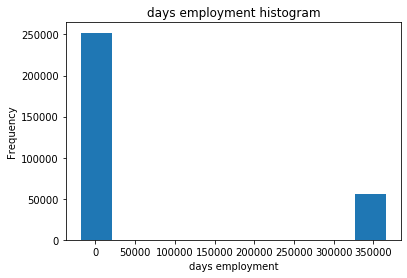

In [16]:
# DAYS_EMPLOYEDÏùò Î∂ÑÌè¨ - hist
app_train['DAYS_EMPLOYED'].plot.hist(title='days employment histogram')
plt.xlabel('days employment')

In [17]:
# ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÏÉÅ Îç∞Ïù¥ÌÑ∞Ïóê ÎπÑÌï¥ ÎåÄÏ∂úÏÉÅÌôò ÎπÑÏú® ÎÜíÏùÄÏßÄ ÎπÑÍµê
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]        # ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]    # Ï†ïÏÉÅ Îç∞Ïù¥ÌÑ∞

print('Ï†ïÏÉÅ Îç∞Ïù¥ÌÑ∞Ïùò {:.2f}%Í∞Ä ÎåÄÏ∂ú ÏÉÅÌôòÏùÑ ÌïúÎã§.'.format(100*non_anom['TARGET'].mean()))
print('ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞Ïùò {:.2f}%Í∞Ä ÎåÄÏ∂ú ÏÉÅÌôòÏùÑ ÌïúÎã§.'.format(100*anom['TARGET'].mean()))
print('Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ï§ë {}Í∞úÍ∞Ä ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞Ïù¥Îã§.'.format(len(anom)))

Ï†ïÏÉÅ Îç∞Ïù¥ÌÑ∞Ïùò 8.66%Í∞Ä ÎåÄÏ∂ú ÏÉÅÌôòÏùÑ ÌïúÎã§.
ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞Ïùò 5.40%Í∞Ä ÎåÄÏ∂ú ÏÉÅÌôòÏùÑ ÌïúÎã§.
Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ï§ë 55374Í∞úÍ∞Ä ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞Ïù¥Îã§.


**ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÑ Í≥†Í∞ùÏù¥ ÎåÄÏ∂úÏÉÅÌôò ÎπÑÏú®Ïù¥ Îçî ÎÇÆÏùÄ Í≤É**ÏùÑ Î≥º Ïàò ÏûàÎã§.     

ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÑ Î†àÏΩîÎìú(record)Î•º Ï≤òÎ¶¨ÌïòÎäî Î∞©ÏãùÏùÄ Îã§ÏñëÌïòÎã§. Í∞ÄÏû• ÏïàÏ†ÑÌïú Î∞©Î≤ï Ï§ë ÌïòÎÇòÎäî **ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÑ Ïª¨ÎüºÏùò Ìï¥Îãπ Í∞íÏùÑ Í≤∞Ï∏°ÏπòÎ°ú Î≥ÄÌôòÌïòÍ≥† ÌäπÏ†ï Í∞íÏúºÎ°ú Ï±ÑÏö∞Îäî Í≤É(Imputation)**Ïù¥Îã§. 

ÌïòÏßÄÎßå ÏúÑÏùò ÌÜµÍ≥ÑÏóêÏÑú Î¥§ÎìØÏù¥ ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞ÎèÑ Ïñ¥Îäê Ï†ïÎèÑ Ï§ëÏöîÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Ìï¥Îãπ Í∞íÏù¥ **ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞ÏòÄÎäîÏßÄ**Î•º Î™®Îç∏ÏóêÍ≤å ÏïåÎ†§Ï§Ñ ÌïÑÏöîÍ∞Ä ÏûàÎã§. Í∑∏ÎûòÏÑú ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞Ïù∏ÏßÄ Ïó¨Î∂ÄÎ•º ÏïåÎ†§Ï£ºÎäî `flag` Ïª¨ÎüºÏùÑ ÏÉùÏÑ±ÌïòÏó¨ `True/False`Î°ú ÎÇòÌÉÄÎÇ¥Î©¥ ÎêúÎã§.

Text(0.5, 0, 'days employment')

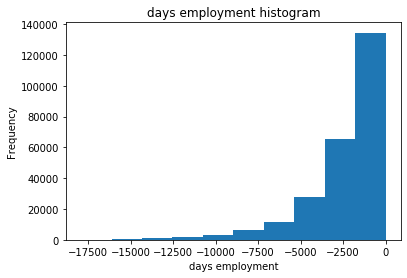

In [18]:
# ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞ ÌîåÎûòÍ∑∏ Ïª¨Îüº ÏÉùÏÑ±
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243

# ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞Ïùò Í∞íÏùÑ NaNÏúºÎ°ú Î≥ÄÌôò
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

# Ï≤òÎ¶¨ ÌõÑ DAYS_EMPLOYED Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî - hist
app_train['DAYS_EMPLOYED'].plot.hist(title='days employment histogram')
plt.xlabel('days employment')

ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞Î•º Ï†úÍ±∞Ìïú Îí§ `DAYS_EMPLOYED`Ïùò Î∂ÑÌè¨Í∞Ä Ïûò ÎÇòÌÉÄÎÇòÎäî Í±∏ Î≥º Ïàò ÏûàÎã§. ÎòêÌïú Î∂ÑÌè¨Î°ú Î≥¥ÏïÑ ÎààÏóê ÎùÑÎäî Ïù¥ÏÉÅÏπòÎèÑ ÏóÜÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.

ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò `DAYS_EMPLOYED`Î•º Ï≤òÎ¶¨Ìï¥Ï£ºÏóàÏúºÎãà ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÎèÑ ÎòëÍ∞ôÏù¥ Ï≤òÎ¶¨Ìï¥Ï§òÏïº ÌïúÎã§. ÏïûÏÑú ÌñàÎçò Í≥ºÏ†ïÏùÑ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÎèÑ ÎòëÍ∞ôÏù¥ Ìï¥Ï£ºÏûê.

In [19]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö©
app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED'] == 365243
app_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

print('Ï†ÑÏ≤¥ {}Í∞úÏùò Îç∞Ïù¥ÌÑ∞ Ï§ë {}Í∞úÍ∞Ä ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞Ïù¥Îã§.'.format(
    app_test['DAYS_EMPLOYED_ANOM'].sum(), len(app_test)))

Ï†ÑÏ≤¥ 9274Í∞úÏùò Îç∞Ïù¥ÌÑ∞ Ï§ë 48744Í∞úÍ∞Ä ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞Ïù¥Îã§.


#### 3.5.2. Correlations
ÌîºÏ≤òÏôÄ `TARGET` Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÌååÏïÖÌïòÎ©¥ Îç∞Ïù¥ÌÑ∞Î•º Ï°∞Í∏à Îçî Ïûò Ïù¥Ìï¥Ìï† Ïàò ÏûàÍ≤åÎêúÎã§. Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò `corr`Ìï®ÏàòÎ°ú Í∞Å ÌîºÏ≤òÏôÄ `TARGET` Í∞ÑÏùò ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Í≥ÑÏÇ∞Ìï¥Î≥¥Ïûê. ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä Îç∞Ïù¥ÌÑ∞ Í∞ÑÏùò Í¥ÄÍ≥ÑÎ•º ÏïÑÏ£º Ïûò ÌëúÌòÑÌïòÎäî Í≤ÉÏùÄ ÏïÑÎãàÏßÄÎßå Ïñ¥Îäê Ï†ïÎèÑÏùò Í¥ÄÍ≥ÑÏÑ±ÏùÄ Î≥¥Ïó¨Ï§Ñ Ïàò ÏûàÎã§. ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏÉÅÍ¥ÄÍ≥ÑÏàòÏùò ÏàòÏπòÎäî Îã§ÏùåÍ≥† Í∞ôÏù¥ ÌèâÍ∞ÄÎêúÎã§.

* **.00 - .19** : Îß§Ïö∞ ÎÇÆÏùå
* **.20 - .39** : ÎÇÆÏùå
* **.40 - .59** : Î≥¥ÌÜµ
* **.60 - .79** : ÎÜíÏùå
* **.80 - 1.0** : Îß§Ïö∞ ÎÜíÏùå

In [20]:
# targetÍ≥ºÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨
correlations = app_train.corr()['TARGET'].sort_values()

print('Í∞ÄÏû• ÌÅ∞ ÏñëÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Í∞ÄÏßÑ TOP 15: \n', correlations.tail(15))
print()
print('Í∞ÄÏû• ÌÅ∞ ÏùåÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Í∞ÄÏßÑ TOP 15: \n', correlations.head(15))

Í∞ÄÏû• ÌÅ∞ ÏñëÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Í∞ÄÏßÑ TOP 15: 
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype

`DAYS_BIRTH`Í∞Ä `TARGET`Í≥º Í∞ÄÏû• ÎÜíÏùÄ ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÄÎäî Í±∏ Î≥º Ïàò ÏûàÎã§.

`DAYS_BIRTH`Îäî ÏùåÏàòÏù¥Í≥† ÏÉÅÍ¥ÄÍ≥ÑÏàòÎäî ÏñëÏàòÏù¥ÎØÄÎ°ú **Í≥†Í∞ùÏùò ÎÇòÏù¥Í∞Ä ÎßéÏùÑÏàòÎ°ù Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Í∞ÄÎä•ÏÑ±Ïù¥ ÎÇÆÏïÑÏßê**ÏùÑ Ïïå Ïàò ÏûàÎã§. ÏïûÏÑú `DAYS_BIRTH`Ïùò ÎπÑÏ†ïÏÉÅ Îç∞Ïù¥ÌÑ∞Î•º Í¥ÄÏ∞∞ÌñàÏùÑ Îïå Ï†ïÏÉÅ ÏàòÏπòÎ°ú Î∞îÍøîÏ£ºÏñ¥ **ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ**Î•º Í∞ÄÏßÄÎèÑÎ°ù Î∞îÍøîÏ£ºÏûê.

#### 3.5.3. Effect of Age on Repayment

In [21]:
# ÏñëÏàòÎ°ú DAYS_BIRTH Î≥ÄÌôò - Ï†àÎåÄÍ∞í
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
# Î≥ÄÌôòÎêú DAYS_BIRTHÏôÄ TARGETÍ≥ºÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

Text(0, 0.5, 'count')

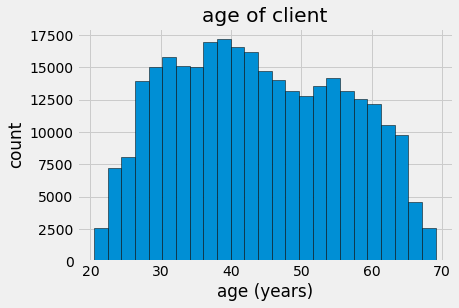

In [22]:
plt.style.use('fivethirtyeight')

# DAYS_BIRTHÏùò Î∂ÑÌè¨ - hist
plt.hist(app_train['DAYS_BIRTH']/365, edgecolor='k', bins=25)
plt.title('age of client')
plt.xlabel('age (years)')
plt.ylabel('count')

Text(0.5, 1.0, 'distribution of age')

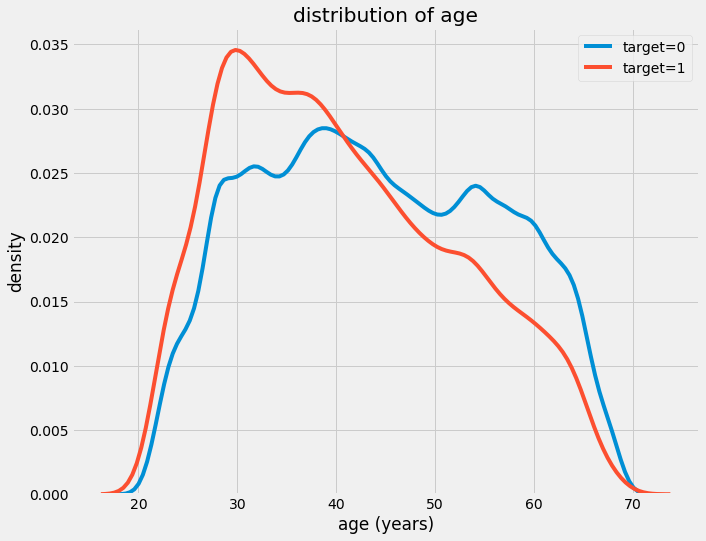

In [23]:
plt.figure(figsize=(10, 8))

# TARGETÏùò Í∞íÎ≥Ñ ÏÇ¨ÎûåÏùò ÎÇòÏù¥(DAYS_BIRTH) Î∂ÑÌè¨ - kdeplot
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label='target=0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label='target=1')

plt.xlabel('age (years)')
plt.ylabel('density')
plt.title('distribution of age')

`target=1`ÏùÑ Î≥¥Î©¥ Í∑∏ÎûòÌîÑÍ∞Ä Ï†äÏùÄ Ïó∞Î†πÎåÄÎ°ú ÌúòÏñ¥Ï†∏ ÏûàÎäî Í≤ÉÏùÑ Î≥º Ïàò ÏûàÎã§.

In [24]:
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# 11Í∞úÎ°ú ÎÇòÏù¥ÎåÄÎ•º Î∂ÑÎ¶¨
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins=np.linspace(20, 70, num=11))
age_data.head(10)

TARGET  DAYS_BIRTH  YEARS_BIRTH  YEARS_BINNED
0       1        9461    25.920548  (25.0, 30.0]
1       0       16765    45.931507  (45.0, 50.0]
2       0       19046    52.180822  (50.0, 55.0]
3       0       19005    52.068493  (50.0, 55.0]
4       0       19932    54.608219  (50.0, 55.0]
5       0       16941    46.413699  (45.0, 50.0]
6       0       13778    37.747945  (35.0, 40.0]
7       0       18850    51.643836  (50.0, 55.0]
8       0       20099    55.065753  (55.0, 60.0]
9       0       14469    39.641096  (35.0, 40.0]

In [25]:
# ÎÇòÏù¥ÎåÄÏóê Îî∞Î•∏ TARGETÏùò ÌèâÍ∑†
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

TARGET    DAYS_BIRTH  YEARS_BIRTH
YEARS_BINNED                                     
(20.0, 25.0]  0.123036   8532.795625    23.377522
(25.0, 30.0]  0.111436  10155.219250    27.822518
(30.0, 35.0]  0.102814  11854.848377    32.479037
(35.0, 40.0]  0.089414  13707.908253    37.555913
(40.0, 45.0]  0.078491  15497.661233    42.459346
(45.0, 50.0]  0.074171  17323.900441    47.462741
(50.0, 55.0]  0.066968  19196.494791    52.593136
(55.0, 60.0]  0.055314  20984.262742    57.491131
(60.0, 65.0]  0.052737  22780.547460    62.412459
(65.0, 70.0]  0.037270  24292.614340    66.555108

Text(0.5, 1.0, 'failure to repay by age group')

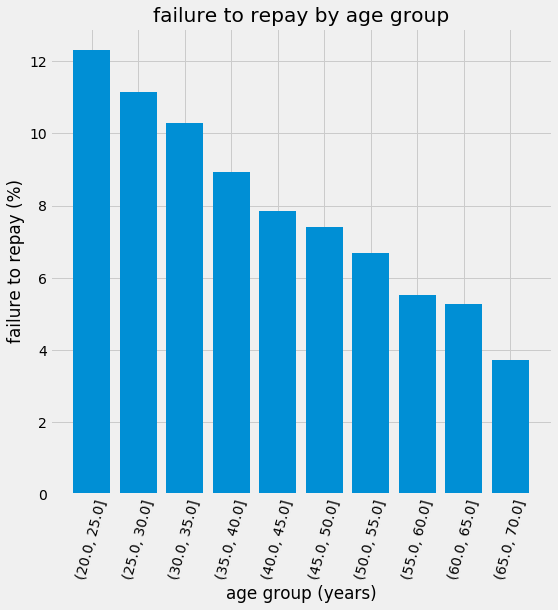

In [26]:
plt.figure(figsize=(8, 8))

# Í∞Å ÎÇòÏù¥ÎåÄ Î≥Ñ TARGET ÌèâÍ∑† - barplot
plt.bar(age_groups.index.astype(str), 100*age_groups['TARGET'])
plt.xticks(rotation=75)
plt.xlabel('age group (years)')
plt.ylabel('failure to repay (%)')
plt.title('failure to repay by age group')

ÏïûÏÑú Ï∂îÏ∏°ÌñàÎçò **ÎÇòÏù¥ÎåÄÍ∞Ä Ïñ¥Î¶¥ÏàòÎ°ù Ï±ÑÎ¨¥Î∂àÏù¥Ìñâ Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÎã§**Îäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§. 
* Í∞ÄÏû• Ïñ¥Î¶∞ ÎÇòÏù¥ÎåÄÏùò ÏÉÅÏúÑ 3Í∞úÏùò Í∑∏Î£πÏù¥ ÏÉÅÌôò Ïã§Ìå®Ïú®Ïù¥ 10%Î•º ÎÑòÎäîÎã§.
* Í∞ÄÏû• ÎÇòÏù¥Í∞Ä ÎßéÏùÄ Í∑∏Î£πÏùò ÏÉÅÌôò Ïã§Ìå®Ïú®ÏùÄ 5%Ïù¥ÌïòÏù¥Îã§.

#### 3.5.4. Exterior Sources
`TARGET`Í≥º Í∞ïÌïú ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïù¥Îäî `EXT_SOURCE_1`, `EXT_SOURCE_2`, `EXT_SOURCE_3`Îäî Ïô∏Î∂Ä Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏ†∏ÏôÄ Ï†ïÍ∑úÌôîÏãúÌÇ® Í∞íÏùÑ ÏùòÎØ∏ÌïúÎã§. Ï†ïÌôïÌûà Î¨¥Ïä® Îç∞Ïù¥ÌÑ∞Ïù∏ÏßÄÎäî ÌäπÏ†ïÌï† Ïàò ÏóÜÏßÄÎßåÏùÄ Ïù¥ NotebookÏùò Ï†ÄÏûêÎäî ÎàÑÏ†Å Ïã†Ïö© Îì±Í∏âÏúºÎ°ú Ï∂îÏ∏°ÌïòÍ≥† ÏûàÎã§.

In [27]:
# EXT_SOURCEÏôÄ TARGETÍ≥ºÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH
TARGET        1.000000     -0.155317     -0.160472     -0.178919   -0.078239
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846    0.600610
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167    0.091996
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000    0.205478
DAYS_BIRTH   -0.078239      0.600610      0.091996      0.205478    1.000000

Text(0.5, 1, 'correlation heatmap')

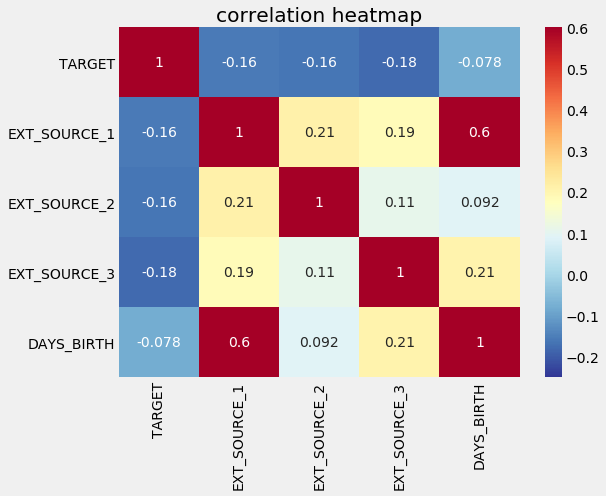

In [28]:
plt.figure(figsize=(8, 6))

# EXT_SOURCEÏôÄ TARGETÍ≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ - heatmap
sns.heatmap(ext_data_corrs, cmap=plt.cm.RdYlBu_r, vmin=-0.25, annot=True, vmax=0.6)
plt.title('correlation heatmap')

`EXT_SOURCE`ÏôÄ `TARGET`ÏùÄ ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÑÎã§. Ï¶â, **EXT_SOURCEÏùò Í∞íÏù¥ Ï¶ùÍ∞ÄÌï†ÏàòÎ°ù ÏÉÅÌôò ÌôïÎ•†Ïù¥ ÎÜíÏïÑÏßê**ÏùÑ ÏùòÎØ∏ÌïúÎã§. ÎòêÌïú `DAYS_BIRTH`ÏôÄ `EXT_SOURCE_1`Ïù¥ ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÄÎäîÎç∞, Ïù¥Îäî Ïù¥ ÌîºÏ≤òÏóê ÏòÅÌñ•ÏùÑ Ï£ºÎäî ÏöîÏù∏Ïù¥ Í≥†Í∞ùÏùò ÎÇòÏù¥ÏûÑÏùÑ Ïïå Ïàò ÏûàÎã§.

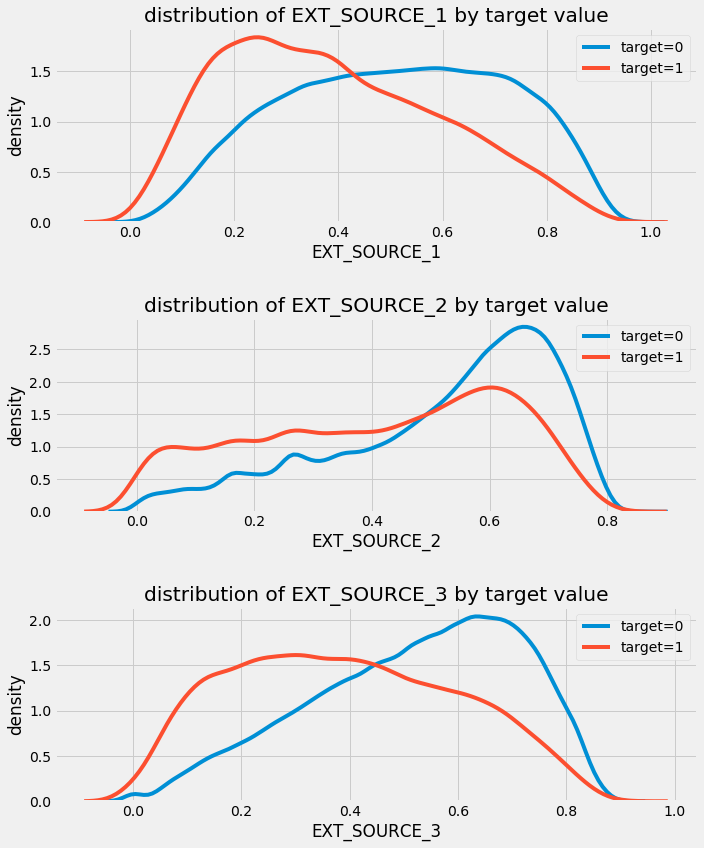

In [29]:
plt.figure(figsize=(10, 12))

# EXT_SOURCEÏùò TARGETÏùò Í∞íÎ≥Ñ Î∂ÑÌè¨ - kdeplot
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    plt.subplot(3, 1, i+1)
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label='target=0')
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label='target=1')
    
    plt.title('distribution of {} by target value'.format(source))
    plt.xlabel(str(source))
    plt.ylabel('density')

# subplot ÏÇ¨Ïù¥Ïùò Í∞ÑÍ≤© Ï°∞Ï†à
plt.tight_layout(h_pad=2.5)

`EXT_SOURCE_3`Ïù¥ Îã§Î•∏ ÌîºÏ≤òÏóê ÎπÑÌï¥ `TARGET`Ïùò Í∞í Î≥Ñ Î∂ÑÌè¨ Ï∞®Ïù¥Í∞Ä ÎßéÏù¥ ÎÇ®ÏùÑ Î≥º Ïàò ÏûàÎã§.

### 3.6. Pairs Plot
pairplotÏúºÎ°ú `EXT_SOURCE`ÏôÄ `YEARS_BIRTH`Ïùò Í¥ÄÍ≥Ñ Í∑∏Î¶¨Í≥† Í∞Å ÌîºÏ≤ò Î≥Ñ Î∂ÑÌè¨Î•º ÏÇ¥Ìé¥Î≥¥Ïûê.

In [30]:
plot_data = ext_data.drop(columns=['DAYS_BIRTH']).copy()

# DAYS_BIRTH ÎåÄÏã† YEARS_BIRTH Ï∂îÍ∞Ä
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# NaNÍ∞í Ï†úÏô∏ Î∞è 10,000Í∞úÏùò Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂ú
plot_data = plot_data.dropna().loc[:10000, :]

In [31]:
# Îëê ÌîºÏ≤ò Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Í≥ÑÏÇ∞
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate('r={:.2f}'.format(r),
               xy=(.2, .8),
               xycoords=ax.transAxes,
               size=20)

pairplotÏóêÏÑú Îπ®Í∞ÑÏÉâüî¥ÏùÄ ÎåÄÏ∂úÎØ∏ÏÉÅÌôò/Ï±ÑÎ¨¥Î∂àÏù¥ÌñâÏùÑ, ÌååÎûÄÏÉâüîµÏùÄ ÎåÄÏ∂úÏÉÅÌôò/Ï±ÑÎ¨¥Ïù¥ÌñâÏùÑ ÎßêÌïúÎã§.

Text(0.5, 1.05, 'ext source and age features pairs plot')

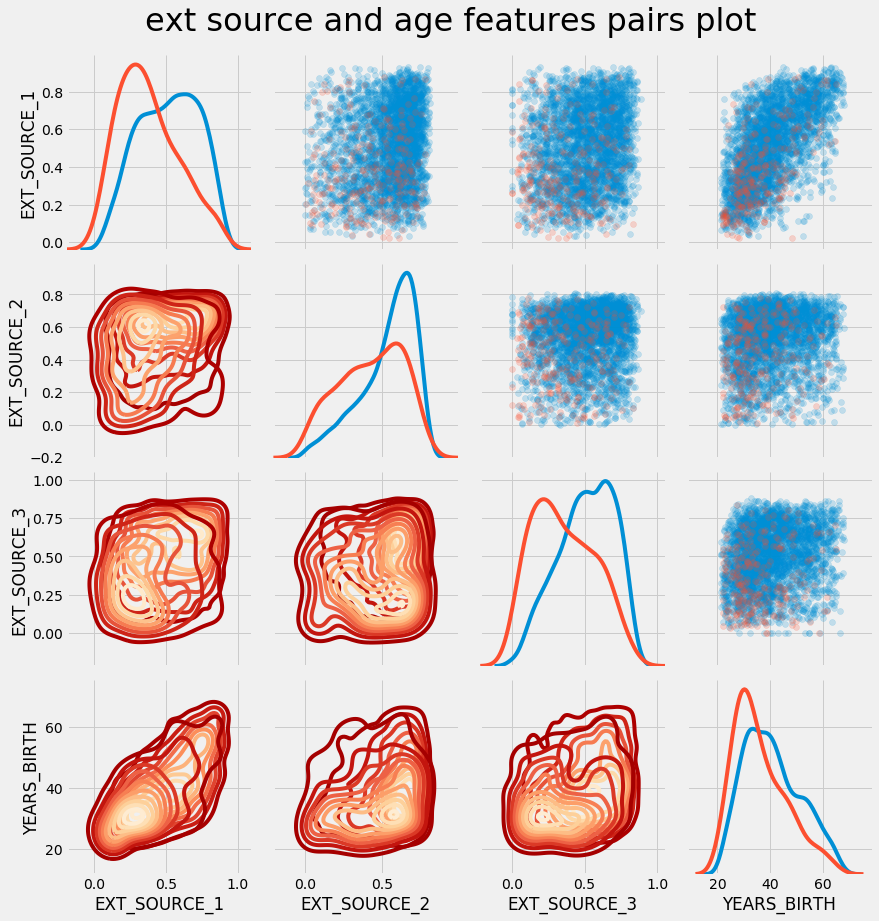

In [32]:
# pairgrid Í∞ùÏ≤¥ ÏÉùÏÑ±
grid = sns.PairGrid(data=plot_data,
                   size=3,
                   diag_sharey=False,
                   hue='TARGET',
                   vars=[x for x in list(plot_data.columns) if x != 'TARGET'])

# ÏÉÅÎã® ÏÇºÍ∞ÅÌòï - scatterplot
grid.map_upper(plt.scatter, alpha=0.2)
# ÎåÄÍ∞ÅÏÑ† - kdeplot
grid.map_diag(sns.kdeplot)
# ÌïòÎã® ÏÇºÍ∞ÅÌòï - kdeplot
grid.map_lower(sns.kdeplot, cmap=plt.cm.OrRd_r)

plt.suptitle('ext source and age features pairs plot', size=32, y=1.05)

ÏïûÏÑú heatmapÏóêÏÑú Î¥§Îçò Í≤ÉÏ≤òÎüº `EXT_SOURCE_1`Í≥º `DAYS_BIRTH`Í∞Ä ÏñëÏùò Î∞©Ìñ•ÏúºÎ°ú ÏÑ†ÌòïÏ†ÅÏù∏ Í¥ÄÍ≥ÑÎ•º Í∞ÄÏßêÏùÑ Î≥º Ïàò ÏûàÎã§.

## 4. Feature Engineering
ÌäπÏÑ± Í≥µÌïô(feature engineering)ÏùÄ Îß§Ïö∞ Ï§ëÏöîÌïòÎã§. Î™®Îç∏ÏùÑ Ïã†Í≤ΩÏç®ÏÑú ÎßåÎìúÎäî Í≤ÉÎ≥¥Îã§Îäî Ï†úÎåÄÎ°úÎêú ÌîºÏ≤òÎ•º ÎßåÎì§Ïñ¥ ÌïôÏäµÌïòÎäî Í≤ÉÏù¥ Îçî Ï¢ãÏùÄ ÏÑ±Í≥ºÎ•º Í∞ÄÏ†∏Ïò¨ Ïàò ÏûàÎã§.

ÌäπÏÑ± Í≥µÌïôÏùÄ Í∏∞Ï°¥Ïùò Îç∞Ïù¥ÌÑ∞Î°ú ÏÉàÎ°úÏö¥ ÌîºÏ≤òÎ•º ÎßåÎìúÎäî **ÌäπÏßï ÏÉùÏÑ±(feature construction)**Í≥º Í∞ÄÏû• Ï§ëÏöîÌïú ÌîºÏ≤òÎ•º ÏÑ†ÌÉùÌïòÎäî **ÌäπÏßï ÏÑ†ÌÉù(feature selection)**ÏúºÎ°ú ÎÇòÎàå Ïàò ÏûàÎã§.

Ïù¥Î≤à NotebookÏóêÏÑú ÎåÄÌëúÏ†ÅÏù∏ ÌäπÏßïÏÉùÏÑ± Î∞©Î≤ï 2Í∞ÄÏßÄÎ•º ÏÇ¨Ïö©Ìï¥Î≥¥Ïûê.
* Polynomial Features
* Domain Knowledge Features

### 4.1. Polynomial Features
Ïù¥ Î∞©Î≤ïÏùÄ **ÌîºÏ≤òÏùò Í±∞Îì≠Ï†úÍ≥±Í≥º ÌîºÏ≤ò Í∞ÑÏùò ÏÉÅÌò∏ÏûëÏö© Ìï≠(interaction term)ÏùÑ ÌîºÏ≤òÎ°ú ÏÉùÏÑ±ÌïòÎäî Í≤É**Ïù¥Îã§. Î®∏Ïã†Îü¨ÎãùÏóêÏÑú Í∑∏Î†áÍ≤å ÏûêÏ£º Ïì∞Ïù¥Îäî Î∞©Î≤ïÏùÄ ÏïÑÎãàÏßÄÎßå ÌòπÏãú ÎèÑÏõÄÏùÑ Ï§ÑÏßÄ Î™®Î•¥Îãà ÏãúÎèÑÌï¥Î≥¥Îäî Í≤ÉÏù¥ Ï¢ãÎã§.

Ïù¥ Î∞©ÏãùÏùÑ Íµ¨ÌòÑÌïòÍ∏∞ ÏúÑÌï¥ÏÑú `scikit-learn`ÏóêÏÑúÎäî `PolynomialFeatures` ÌÅ¥ÎûòÏä§Î•º Ï†úÍ≥µÌïòÍ≥† ÏûàÎã§. Ï∞®ÏàòÎ•º 3ÏúºÎ°ú ÏÑ§Ï†ïÌïòÍ≥† ÌäπÏßï ÏÉùÏÑ± ÌõÑÎ•º ÏÇ¥Ìé¥Î≥¥Ïûê.

Ï∞∏Í≥†Î°ú Ï∞®ÏàòÍ∞Ä ÎÑàÎ¨¥ ÎÜíÏúºÎ©¥ ÌîºÏ≤òÏùò Í∞íÏù¥ Í∏∞ÌïòÍ∏âÏàòÏ†ÅÏúºÎ°ú ÎÜíÏïÑÏ†∏ Ïò§Î≤ÑÌîºÌåÖÏùÑ Ïú†Î∞úÌï† Ïàò ÏûàÏúºÎãà Ï†ÅÏ†àÌïú Ï∞®ÏàòÎ•º ÏÇ¨Ïö©Ìï† Í≤É!

In [33]:
# Polynomial ÌîºÏ≤òÎ•º ÎßåÎì§ Î≥ÄÏàò Ï∂îÏ∂ú
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

In [34]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

# TARGETÍ≥º Îã§Î•∏ ÌîºÏ≤òÎì§ Î∂ÑÎ¶¨
poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns=['TARGET'])

# Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

In [35]:
from sklearn.preprocessing import PolynomialFeatures

# Ï∞®Ïàò 3Ïùò PolynomialFeatures Í∞ùÏ≤¥ ÏÉùÏÑ±
poly_transformer = PolynomialFeatures(degree=3)
poly_transformer.fit(poly_features)

# ÌïôÏäµ/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)

print('Polynomial ÌîºÏ≤ò ÏÉùÏÑ± ÌõÑ poly_featuresÏùò ÌÅ¨Í∏∞ :', poly_features.shape)

Polynomial ÌîºÏ≤ò ÏÉùÏÑ± ÌõÑ poly_featuresÏùò ÌÅ¨Í∏∞ : (307511, 35)


In [36]:
# ÏÉùÏÑ±Îêú ÌîºÏ≤ò Ï§ë 15Í∞ú Ï∂úÎ†•
poly_transformer.get_feature_names(
    input_features=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

`TARGET`Í≥º ÏÉàÎ°úÏö¥ ÌîºÏ≤ò Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÏÇ¥Ìé¥Î≥¥Ïûê.

In [37]:
poly_features = pd.DataFrame(poly_features, columns=poly_transformer.get_feature_names(
    ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

# target ÌîºÏ≤ò Ï∂îÍ∞Ä
poly_features['TARGET'] = poly_target

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞ Î∞è Ïó≠Ï†ïÎ†¨
poly_corrs = poly_features.corr()['TARGET'].sort_values()

print('Í∞ÄÏû• ÌÅ∞ ÏñëÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Í∞ÄÏßÑ TOP 10: \n', poly_corrs.tail(10))
print()
print('Í∞ÄÏû• ÌÅ∞ ÏùåÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Í∞ÄÏßÑ TOP 10: \n', poly_corrs.head(10))

Í∞ÄÏû• ÌÅ∞ ÏñëÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Í∞ÄÏßÑ TOP 10: 
 EXT_SOURCE_1                -0.098887
EXT_SOURCE_1^2 DAYS_BIRTH   -0.097507
EXT_SOURCE_1 DAYS_BIRTH^2   -0.094913
EXT_SOURCE_1^2              -0.091034
EXT_SOURCE_1^3              -0.083005
DAYS_BIRTH                  -0.078239
DAYS_BIRTH^2                -0.076672
DAYS_BIRTH^3                -0.074273
TARGET                       1.000000
1                                 NaN
Name: TARGET, dtype: float64

Í∞ÄÏû• ÌÅ∞ ÏùåÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Í∞ÄÏßÑ TOP 10: 
 EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2  

Î™áÎ™á ÌîºÏ≤òÎäî ÏõêÎûò ÌîºÏ≤òÎ≥¥Îã§ Îçî ÌÅ∞ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ñÎäî Í≤ÉÏùÑ Î≥º Ïàò ÏûàÎã§.

ÏùºÎã® ÏÉàÎ°ú ÎßåÎì† ÌîºÏ≤òÎ•º Ï∂îÍ∞ÄÌïú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÏÉùÏÑ±ÌïòÏó¨ ÌõÑÏóê Ïù¥ ÌîºÏ≤òÍ∞Ä ÏûàÏùÑ ÎïåÏôÄ ÏóÜÏùÑ ÎïåÏùò ÏÑ±Îä•ÏùÑ ÎπÑÍµêÌï¥Î≥º Í≤ÉÏù¥Îã§.

In [38]:
poly_features_test = pd.DataFrame(poly_features_test, columns=poly_transformer.get_feature_names([
                                  'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

# SK_ID_CURR Ï∂îÍ∞Ä
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on='SK_ID_CURR', how='left')
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on='SK_ID_CURR', how='left')

# ÌïôÏäµ/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Í≥µÌÜµ ÌîºÏ≤òÎßå ÎÇ®Í∏∞Í∏∞
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join='inner', axis=1)

print('Polynomial ÌîºÏ≤òÍ∞Ä ÏûàÏùÑ ÎïåÏùò ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞ :', app_train_poly.shape)
print('Polynomial ÌîºÏ≤òÍ∞Ä ÏûàÏùÑ ÎïåÏùò ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞ :', app_test_poly.shape)

Polynomial ÌîºÏ≤òÍ∞Ä ÏûàÏùÑ ÎïåÏùò ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞ : (307511, 275)
Polynomial ÌîºÏ≤òÍ∞Ä ÏûàÏùÑ ÎïåÏùò ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞ : (48744, 275)


### 4.2. Domain Knowledge Features
Ìï¥Îãπ Î∂ÑÏïºÏùò ÏßÄÏãùÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏÉàÎ°úÏö¥ ÌîºÏ≤òÎ•º ÎßåÎì§ Ïàò ÏûàÎã§. [AguiarÏùò Notebook](https://www.kaggle.com/jsaguiar/lightgbm-with-simple-features)ÏùÑ Ï∞∏Í≥†ÌïòÏó¨ Îã§ÏùåÏùò 4Í∞úÏùò ÌîºÏ≤òÎ•º ÏÉùÏÑ±Ìï¥Î≥¥Ïûê.

* `CREDIT_INCOME_PERCENT` : Í≥†Í∞ùÏùò ÏÜåÎìù ÎåÄÎπÑ Ïã†Ïö© Í±∞ÎûòÏùò ÎπÑÏú®
* `ANNUITY_INCOME_PERCENT` : Í≥†Í∞ù ÏÜåÎìù ÎåÄÎπÑ ÎåÄÏ∂ú Ïó∞Í∏àÏùò ÎπÑÏú®
* `CREDIT_TERM` : Ïõê ÎÇ©ÏûÖÍ∏∞Í∞Ñ (Ïó∞Í∏àÏù¥ Ïõî ÎÇ©ÏûÖÏï°Ïù¥Í∏∞ ÎïåÎ¨∏)
* `DAYS_EMPLOYED_PERCENT` : Í≥†Í∞ù ÎÇòÏù¥ ÎåÄÎπÑ Í≥†Ïö© ÏùºÏàòÏùò ÎπÑÏú®

In [39]:
# ÎèÑÎ©îÏù∏ ÏßÄÏãù Í¥ÄÎ†® ÌîºÏ≤ò Ï†ÑÏö© Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

In [40]:
# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò ÎèÑÎ©îÏù∏ ÏßÄÏãù ÌîºÏ≤ò ÏÉùÏÑ±
app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / \
    app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / \
    app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / \
    app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / \
    app_train_domain['DAYS_BIRTH']

In [41]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÎèÑÎ©îÏù∏ ÏßÄÏãù ÌîºÏ≤ò ÏÉùÏÑ±
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / \
    app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / \
    app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / \
    app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / \
    app_test_domain['DAYS_BIRTH']

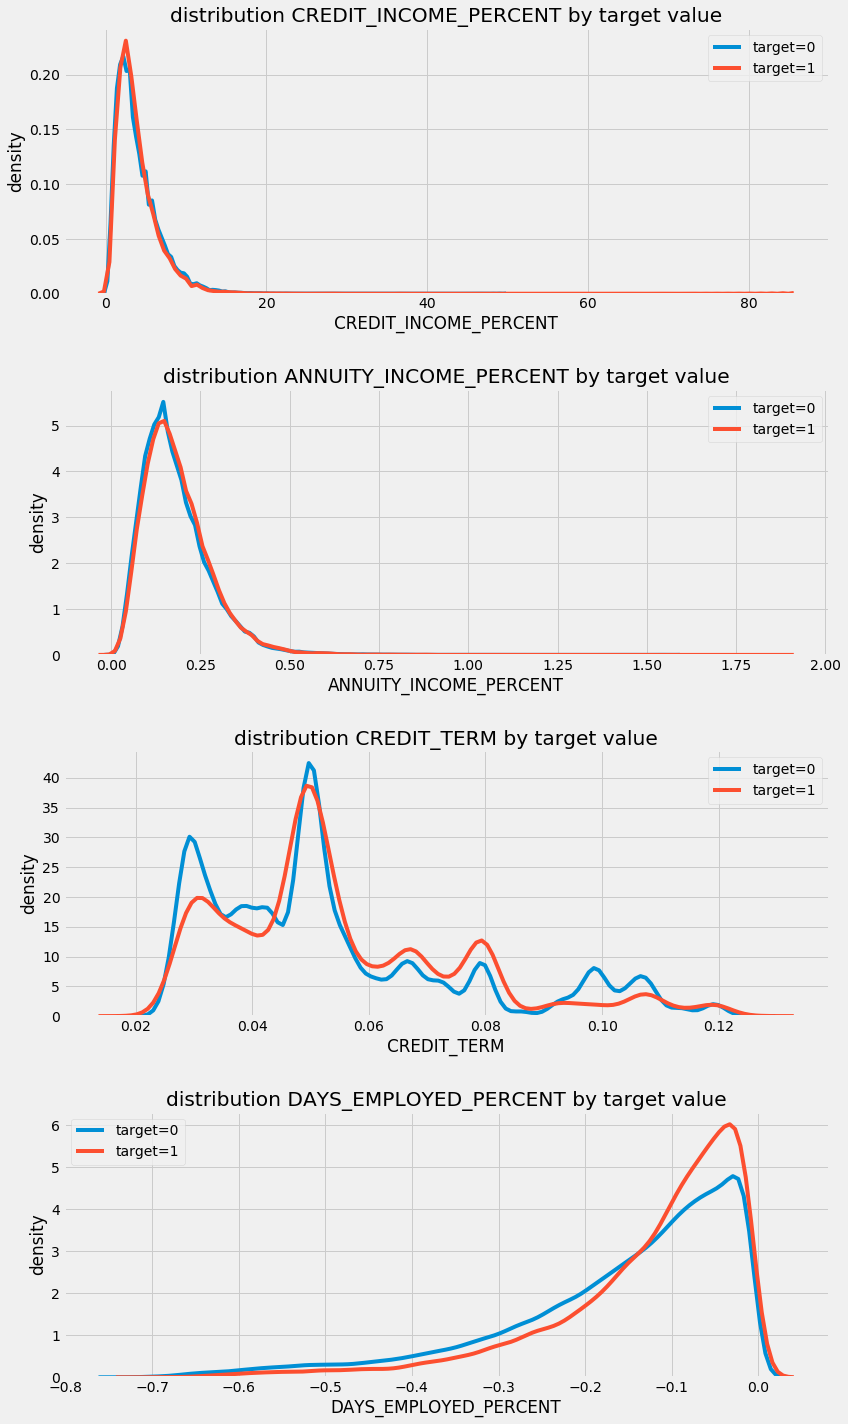

In [42]:
plt.figure(figsize=(12, 20))

# ÏÉàÎ°ú ÏÉùÏÑ±Ìïú ÎèÑÎ©îÏù∏ ÏßÄÏãù ÌîºÏ≤òÏùò Î∂ÑÌè¨ - kdeplot
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    plt.subplot(4, 1, i+1)
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET']==0, feature], label='target=0')
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET']==1, feature], label='target=1')
    
    plt.title('distribution {} by target value'.format(feature))
    plt.xlabel(str(feature))
    plt.ylabel('density')

# subplot ÏÇ¨Ïù¥ Í∞ÑÍ≤© Ï°∞Ï†à
plt.tight_layout(h_pad=2.5)

ÌõÑÏóê ÏÉàÎ°ú ÏÉùÏÑ±Îêú ÌîºÏ≤òÎ•º ÎÑ£Í≥† Î™®Îç∏ÏùÑ ÌïôÏäµÌñàÏùÑ ÎïåÏôÄ ÎÑ£ÏßÄ ÏïäÍ≥† ÌïôÏäµÌñàÏùÑ ÎïåÏùò ÏÑ±Îä•ÏùÑ ÎπÑÍµêÌï¥Î≥¥Ïûê.

## 5. Baseline
Î≤†Ïù¥Ïä§ÎùºÏù∏ÏùÄ **Í∏∞Ï§ÄÏÑ†**ÏúºÎ°ú Í∞úÏÑ†Îêú Î™®Îç∏(Improved Model)ÏùÑ ÎßåÎì§Í∏∞ Ï†ÑÏóê Í∏∞Ï§ÄÏù¥ ÎêòÎäî Î™®Îç∏ÏùÑ ÎßêÌïúÎã§. Ïù¥ ÎåÄÌöåÏùò Í≤ΩÏö∞ ÌèâÍ∞ÄÏßÄÌëúÎ°ú `ROC-AUC`Î•º ÏÇ¨Ïö©ÌïúÎã§. ÎÇòÏù¥Î∏å Î≤†Ïù¥Ïä§ÎùºÏù∏(Naive Baseline)Ïùò Í≤ΩÏö∞ ÎûúÎç§ÏúºÎ°ú 0Í≥º 1ÏùÑ ÏòàÏ∏°ÌïúÎã§Í≥† Ìï† Îïå Í∞íÏù¥ 0.5Ïù¥ÎØÄÎ°ú Íµ≥Ïù¥ ÎßåÎì§ ÌïÑÏöîÍ∞Ä ÏóÜÎã§. 

Ï°∞Í∏à Îçî Î≥µÏû°Ìïú *Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î≤†Ïù¥Ïä§ÎùºÏù∏(Logistic Regression Baseline)*ÏùÑ Íµ¨ÌòÑÌï¥Î≥¥Ïûê.

### 5.1. Logistic Regression Implementation

In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# target ÌîºÏ≤ò Î∂ÑÎ¶¨
if 'TARGET' in app_train:
    train = app_train.drop(columns=['TARGET'])
else:
    train = app_train.copy()

features = list(train.columns)  # ÌîºÏ≤ò Ïù¥Î¶Ñ Ï∂îÏ∂ú
test = app_test.copy()          # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨

# Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞
imputer = SimpleImputer(strategy='median')    # Imputer Í∞ùÏ≤¥ ÏÉùÏÑ±
imputer.fit(train)
train = imputer.transform(train)
test = imputer.transform(app_test)

# 0Í≥º 1ÏÇ¨Ïù¥Ïùò Í∞íÏúºÎ°ú Ï†ïÍ∑úÌôî
scaler = MinMaxScaler(feature_range=(0, 1))   # MinMaxScaler Í∞ùÏ≤¥ ÏÉùÏÑ±
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞ :', train.shape)
print('ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞ :', test.shape)

ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞ : (307511, 240)
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞ : (48744, 240)


In [44]:
from sklearn.linear_model import LogisticRegression

# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÏÉùÏÑ±
# Í∑úÏ†ú Í≥ÑÏàò ÏÑ§Ï†ï - ÎÇÆÏùÑÏàòÎ°ù Ïò§Î≤ÑÌîºÌåÖ Í∞êÏÜå
log_reg = LogisticRegression(C=0.0001)

# Î™®Îç∏ ÌïôÏäµ
log_reg.fit(train, train_labels)       

# Î™®Îç∏ ÌôïÎ•† ÏòàÏ∏°
# Ï≤´ Î≤àÏß∏ Ïª¨ÎüºÏùÄ target=0, Îëê Î≤àÏß∏ Ïª¨ÎüºÏùÄ target=1ÏùºÎïåÏùò ÌôïÎ•†
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [45]:
# submission Ìè¨Îß∑Ïóê ÎßûÏ∂∞ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred
submit.head()

SK_ID_CURR    TARGET
0      100001  0.078515
1      100005  0.137926
2      100013  0.082194
3      100028  0.080921
4      100038  0.132618

In [46]:
# submission ÌååÏùº Ï†ÄÏû•
submit.to_csv('../data/log_reg_baseline_2.csv', index=False)

Ïö∞Î¶¨Îäî 0Í≥º 1Ïù¥ÏïÑÎãå **ÎåÄÏ∂ú ÏÉÅÌôòÌïòÏßÄ ÏïäÏùÑ ÌôïÎ•†**ÏùÑ ÏòàÏ∏°ÌïòÏòÄÎã§. Ï†úÏ∂ú ÏãúÏóêÎäî ÌäπÏ†ï Í≤ΩÍ≥ÑÍ∞í(threshold)Î•º ÏÑ§Ï†ïÌïòÏó¨ 0Í≥º 1Î°ú Î∂ÑÎ•òÌïòÏó¨ Ï†úÏ∂úÌïòÎ©¥ ÎêúÎã§.

Ï∞∏Í≥†Î°ú Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ÏùÑ Ï∫êÍ∏ÄÏóê Ï†úÏ∂úÌïòÎ©¥ ÏïΩ **0.671**Ïùò Ï†êÏàòÎ•º ÏñªÏùÑ Ïàò ÏûàÎã§.

### 5.2. Improved Model: Random Forest

Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏Ïùò Í≤ΩÏö∞ ÏÑ±Îä•Ïù¥ Îß§Ïö∞ ÎÇÆÏùÄ Í±∏ Î≥º Ïàò ÏûàÎã§. Ïù¥Î≤àÏóêÎäî Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÎåÄÏã† Ïó¨Îü¨ Í∞úÏùò Ìä∏Î¶¨Î•º ÎßåÎì§Ïñ¥ ÏòàÏ∏°ÌïòÎäî *ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏(Random Forest)*ÏùÑ ÎßåÎì§Ïñ¥Î≥¥Ïûê. Ï∞∏Í≥†Î°ú Ìä∏Î¶¨Ïùò Í∞úÏàòÎäî 100Í∞úÏù¥Îã§.

In [47]:
from sklearn.ensemble import RandomForestClassifier

# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ ÏÉùÏÑ±
random_forest = RandomForestClassifier(n_estimators=100, random_state=50, verbose=1, n_jobs=-1)

# Î™®Îç∏ ÌïôÏäµ
random_forest.fit(train, train_labels)

# ÌäπÏÑ± Ï§ëÏöîÎèÑ(feature importance) Ï∂îÏ∂ú
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Î™®Îç∏ ÏòàÏ∏°
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   37.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished


In [48]:
# submission Ìè¨Îß∑Ïóê ÎßûÏ∂∞ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# submission ÌååÏùº Ï†ÄÏû•
submit.to_csv('../data/random_forest_baseline_2.csv', index=False)

ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏Ïùò Í≤ΩÏö∞ ROC-AUC Ï†êÏàòÍ∞Ä ÏïΩ **0.678**Ïù¥ ÎÇòÏò®Îã§.

### 5.3. Make Predictions using Engineered Features
ÏïûÏÑú ÎßåÎì§ÏóàÎçò ÏÉàÎ°úÏö¥ ÌîºÏ≤òÎì§Ïù¥ Î™®Îç∏Ïùò ÏÑ±Îä•Ïóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäîÏßÄ ÏÇ¥Ìé¥Î≥¥Ïûê.

#### 5.3.1. Polynomial Features


In [49]:
poly_features_names = list(app_train_poly.columns)

# Í≤∞Ï∏°Ïπò ÎåÄÏ≤¥
imputer = SimpleImputer(strategy='median')    # SimpleImputer Í∞ùÏ≤¥ ÏÉùÏÑ±
poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

# 0Í≥º 1ÏÇ¨Ïù¥Ïùò Í∞íÏúºÎ°ú Ïä§ÏºÄÏùºÎßÅ
scaler = MinMaxScaler(feature_range=(0, 1))   # MinMaxScaler Í∞ùÏ≤¥ ÏÉùÏÑ±
poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

In [50]:
# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ ÏÉùÏÑ±
random_forest_poly = RandomForestClassifier(
    n_estimators=100, random_state=50, verbose=1, n_jobs=-1)

# Î™®Îç∏ ÌïôÏäµ
random_forest_poly.fit(poly_features, train_labels)

# Î™®Îç∏ ÏòàÏ∏°
predictions = random_forest_poly.predict_proba(poly_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   44.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [51]:
# submission Ìè¨Îß∑Ïóê ÎßûÏ∂∞ Îç∞Ïù¥Ìä∏ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# submission ÌååÏùº Ï†ÄÏû•
submit.to_csv('../data/random_forest_baseline_engineered_2.csv', index=False)

Ïù¥ Î™®Îç∏ÏùÑ Ï†úÏ∂úÌïòÎ©¥ ÏïΩ **0.678**Ïùò Ï†êÏàòÎ•º ÏñªÏùÑ Ïàò ÏûàÎã§. Polynomial ÌîºÏ≤òÏùò Í≤ΩÏö∞ Ïì∏Î™®Í∞Ä ÏóÜÏùåÏùÑ Ïïå Ïàò ÏûàÎã§.

#### 5.3.2. Domain Knowledge Features

In [52]:
app_train_domain = app_train_domain.drop(columns='TARGET')
domain_features_names = list(app_train_domain.columns)

# Í≤∞Ï∏°Ïπò ÎåÄÏ≤¥
imputer = SimpleImputer(strategy = 'median')     # SimpleImputer Í∞ùÏ≤¥ ÏÉùÏÑ±
domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(app_test_domain)

# 0Í≥º 1ÏÇ¨Ïù¥Ïùò Í∞íÏúºÎ°ú Ïä§ÏºÄÏùºÎßÅ
scaler = MinMaxScaler(feature_range=(0, 1))      # MinMaxScaler Í∞ùÏ≤¥ ÏÉùÏÑ±
domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

In [53]:
# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ ÏÉùÏÑ±
random_forest_domain = RandomForestClassifier(
    n_estimators=100, random_state=50, verbose=1, n_jobs=-1)

# Î™®Îç∏ ÌïôÏäµ
random_forest_domain.fit(domain_features, train_labels)

# ÌäπÏÑ± Ï§ëÏöîÎèÑ Ï∂îÏ∂ú
feature_importances_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame(
    {'feature': domain_features_names, 'importance': feature_importances_values_domain})

# Î™®Îç∏ ÏòàÏ∏°
predictions = random_forest_domain.predict_proba(domain_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   35.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


In [54]:
# submission Ìè¨Îß∑Ïóê ÎßûÏ∂∞ Îç∞Ïù¥Ìä∏ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# submission ÌååÏùº Ï†ÄÏû•
submit.to_csv('../data/random_forest_baseline_domain_2.csv', index=False)

Ïù¥ Î™®Îç∏Ïùò Í≤ΩÏö∞ Ï†úÏ∂ú Ïãú ÏïΩ **0.679**Ïù∏ Í≤ÉÏúºÎ°ú Î≥¥ÏïÑ Ïù¥ ÌîºÏ≤òÎèÑ Í∑∏Îã• ÎèÑÏõÄÏù¥ ÎêòÏßÄ ÏïäÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§.

### 5.4. Model Interpretation: Feature Importances

In [55]:
# ÌäπÏÑ± Ï§ëÏöîÎèÑ ÏàúÏúºÎ°ú Ïó≠Ï†ïÎ†¨ + ÏãúÍ∞ÅÌôî
def plot_feature_importances(df):
    # ÌäπÏÑ± Ï§ëÏöîÎèÑÎ•º Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨
    df = df.sort_values('importance', ascending=False).reset_index()
    
    # Ï†ïÍ∑úÌôî
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    
    # ÌäπÏÑ± Ï§ëÏöîÎèÑ ÏàúÏúºÎ°ú ÏãúÍ∞ÅÌôî - barh
    plt.figure(figsize=(10, 6))
    ax = plt.subplot()
    
    # Ï†ïÍ∑úÌôîÎêú ÌäπÏÑ± Ï§ëÏöîÎèÑÎ•º Í∏∞Ï§ÄÏúºÎ°ú Ïó≠Ï†ïÎ†¨
    ax.barh(list(reversed(list(df.index[:15]))),
           df['importance_normalized'].head(15),
           align='center',
           edgecolor='k')
    
    # ÏãúÍ∞ÅÌôî ÏÑ∏Î∂ÄÏÑ§Ï†ï
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    plt.xlabel('normalized importance')
    plt.title('feature importances')
    
    plt.show()
    
    return df

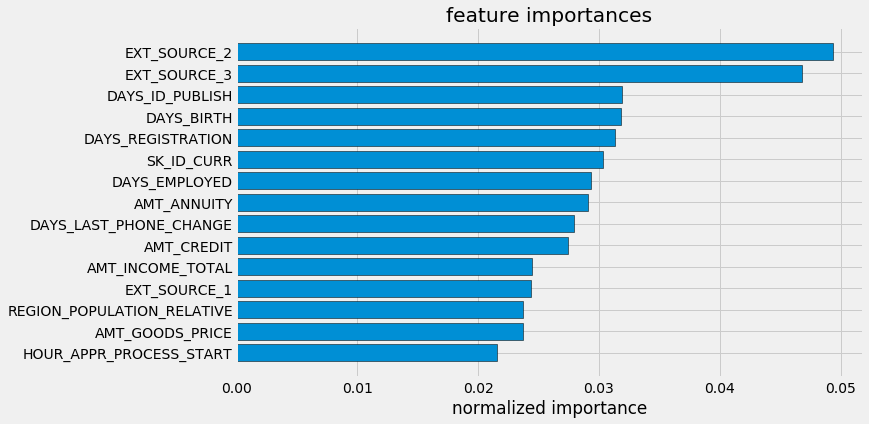

In [56]:
feature_importances_sorted = plot_feature_importances(feature_importances)

ÏòàÏÉÅÌñàÎã§ Ïã∂Ïù¥ `EXT_SOURCE`ÏôÄ `DAYS_BIRTH`Í∞Ä Ï§ëÏöîÌïú ÌîºÏ≤òÏûÑÏùÑ Î≥º Ïàò ÏûàÎã§. 

ÌäπÏÑ± Ï§ëÏöîÎèÑÎ•º Í∞ÄÏßÄÍ≥† Î™®Îç∏Ïù¥ ÏòàÏ∏°Ìï† Îïå Ïñ¥Îñ§ ÏöîÏÜåÎ•º Í≥†Î†§ÌïòÎäîÏßÄ Ïù¥Ìï¥Ìï† Ïàò ÏûàÎã§. Ïù¥Î•º ÏÑ±Îä• Ï†ÄÌïò ÏóÜÏù¥ ÎßéÏùÄ ÌîºÏ≤òÎì§ÏùÑ Ï†úÍ±∞ÌïòÍ±∞ÎÇò Ï∞®Ïõê Ï∂ïÏÜåÏãú Ìï¥Îãπ Ï†ïÎ≥¥Î•º Ïù¥Ïö©Ìï† Ïàò ÏûàÎã§.

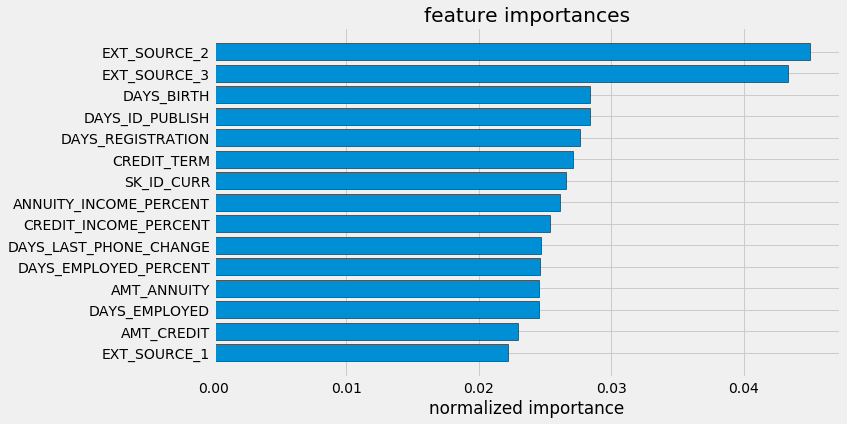

In [57]:
feature_importances_domain_sorted = plot_feature_importances(feature_importances_domain)

ÏïûÏÑú ÎßåÎì† ÎèÑÎ©îÏù∏ ÏßÄÏãù ÌîºÏ≤ò 4Í∞ú Î™®Îëê ÏÉÅÏúÑ 15%Ïóê Ïò¨ÎùºÏôÄ ÏûàÎäî Í≤ÉÏùÑ Î≥º Ïàò ÏûàÎã§. ÎèÑÎ©îÏù∏ ÏßÄÏãù ÌîºÏ≤òÍ∞Ä ÌÅ¨ÏßÑ ÏïäÏßÄÎßå Î∂ÄÎ∂ÑÏ†ÅÏúºÎ°ú Ìö®Í≥ºÍ∞Ä ÏûàÏùåÏùÑ Ïïå Ïàò ÏûàÎã§.

## 6. Just for Fun: Light Gradient Boosting Machine

In [58]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

In [59]:
def model(features, test_features, encoding='ohe', n_folds=5):
    '''
    ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ lgbm Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ§Í≥† ÏòàÏ∏°

    Parameters
    ----------
        - features (pd.DataFrame): Î™®Îç∏ ÌïôÏäµÏóê ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ. TARGET ÌîºÏ≤òÎ•º Í∞ÄÏßÄÍ≥† ÏûàÏñ¥ÏïºÌï®.
        - test_features (pd.DataFrame): Î™®Îç∏ ÏòàÏ∏°Ïóê ÏÇ¨Ïö©Ìï† ÌÖåÏä§Ìä∏ ÌîºÏ≤òÎì§Ïùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ.
        - encoding (str, default='ohe'): Ïπ¥ÌÖåÍ≥†Î¶¨Ìòï Î≥ÄÏàò Ïù∏ÏΩîÎî© Î∞©Î≤ï. 'ohe'Îäî Ïõê-Ìï´ Ïù∏ÏΩîÎî©ÏùÑ, 'le'ÏùÄ ÎùºÎ≤®Ïù∏ÏΩîÎî©ÏùÑ ÎßêÌï®.
        - n_folds(int, default=5): ÍµêÏ∞® Í≤ÄÏ¶ùÏãú ÏÇ¨Ïö©Ìï† Ìè¥Îìú Ïàò

    Return
    ----------
        - submission (pd.DataFrame): 'SK_ID_CURR'ÏôÄ Î™®Îç∏Ïù¥ ÏòàÏ∏°Ìïú 'TARGET'Ïù¥ ÏûàÎäî Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
        - feature_importances (pd.DataFrame): Î™®Îç∏Î°úÎ∂ÄÌÑ∞ ÎÇòÏò® feature importancesÎ°ú Îêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
        - valid_metrics (pd.DataFrame): Í∞Å Ìè¥Îìú Î∞è Ï†ÑÏ≤¥Ï†ÅÏù∏ ÌïôÏäµÍ≥º Í≤ÄÏ¶ù ÌèâÍ∞ÄÏßÄÌëú(ROC-AUC)Î°ú Îêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    '''
    
    # id Ï∂îÏ∂ú
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú target Ï∂îÏ∂ú
    labels = features['TARGET']
    
    # idÏôÄ target Ï†úÍ±∞
    features = features.drop(columns=['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns=['SK_ID_CURR'])
    
    # Ïπ¥ÌÖåÍ≥†Î¶¨ Ïù∏Îç±Ïä§ Ï†ÄÏû• Î¶¨Ïä§Ìä∏
    cat_indices = []                  
    
    # Ïπ¥ÌÖåÍ≥†Î¶¨Ìòï Î≥ÄÏàò Ïù∏ÏΩîÎî©
    # Ïõê-Ìï´ Ïù∏ÏΩîÎî©
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # ÌïôÏäµ/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Í≥µÌÜµ ÌîºÏ≤òÎßå ÎÇ®ÍπÄ
        features, test_features = features.align(test_features, join='inner', axis=1)
        
        cat_indices = 'auto'
    # ÎùºÎ≤® Ïù∏ÏΩîÎî©
    elif encoding == 'le':
        label_encoder = LabelEncoder()    # LabelEncoder Í∞ùÏ≤¥ ÏÉùÏÑ±
         
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Ïπ¥ÌÖåÍ≥†Î¶¨ ÌîºÏ≤òÎ•º Ï†ïÏàòÎ°ú Îß§Ìïë
                features[col] = label_encoder.fit_transform(
                    np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(
                    np.array(test_features[col].astype(str)).reshape((-1,)))
                
                # Ïπ¥ÌÖåÍ≥†Î¶¨ Ïù∏Îç±Ïä§ Í∏∞Î°ù
                cat_indices.append(i)
    # Îëò Îã§ ÏïÑÎãê Í≤ΩÏö∞ ÏóêÎü¨ Î∞úÏÉù
    else:
        raise ValueError('Ïù∏ÏΩîÎî© ÌòïÏãùÏùÄ "ohe" ÎÇò "le" Ï§ë ÌïòÎÇòÏó¨Ïïº Ìï©ÎãàÎã§.')
    
    print('ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞ :', features.shape)
    print('ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞ :', test_features.shape)
    
    # ÌîºÏ≤ò Î™Ö Ï∂îÏ∂ú
    feature_names = list(features.columns)
    
    # np.arrayÎ°ú Î≥ÄÌôò
    features = np.array(features)
    test_features = np.array(test_features)
    
    # KFold Í∞ùÏ≤¥ ÏÉùÏÑ±
    k_fold = KFold(n_splits=n_folds, shuffle=True, random_state=50)
    
    # ÌäπÏÑ± Ï§ëÏöîÎèÑ Í∏∞Î°ùÏùÑ ÏúÑÌïú Îπà Î∞∞Ïó¥ ÏÉùÏÑ±
    feature_importance_values = np.zeros(len(feature_names))
    
    # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°ÏùÑ Í∏∞Î°ùÌïòÍ∏∞ ÏúÑÌïú Îπà Î∞∞Ïó¥ ÏÉùÏÑ±
    test_predictions = np.zeros(test_features.shape[0])
    
    # Ìè¥Îìú Î≥Ñ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°ÏùÑ Í∏∞Î°ùÌïòÍ∏∞ ÏúÑÌïú Îπà Î∞∞Ïó¥ ÏÉùÏÑ±
    out_of_fold = np.zeros(features.shape[0])
    
    # ÌïôÏäµÍ≥º Í≤ÄÏ¶ù Ï†êÏàòÎ•º Í∏∞Î°ùÌïòÍ∏∞ ÏúÑÌïú Î¶¨Ïä§Ìä∏
    valid_scores = []
    train_scores = []
    
    # ÍµêÏ∞® Í≤ÄÏ¶ù
    for train_indices, valid_indices in k_fold.split(features):
        # ÌòÑÏû¨ Ìè¥ÎìúÏóêÏÑúÏùò ÌïôÏäµ Îç∞Ïù¥ÌÑ∞
        train_features, train_labels = features[train_indices], labels[train_indices]
        # ÌòÑÏû¨ Ìè¥ÎìúÏóêÏÑúÏùò Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # LightGBM Î™®Îç∏ ÏÉùÏÑ±
        model = lgb.LGBMClassifier(n_estimators=10000, objective='binary',
                                  class_weight='balanced', learning_rate=0.05,
                                  reg_alpha=0.1, reg_lambda=0.1,
                                  subsample=0.8, n_jobs=-1,
                                  random_state=50)
        
        # Î™®Îç∏ ÌïôÏäµ
        model.fit(train_features, train_labels, eval_metric='auc',
                 eval_set=[(valid_features, valid_labels), (train_features, train_labels)],
                 eval_names=['valid', 'train'],
                 categorical_feature=cat_indices,
                 early_stopping_rounds=100,
                 verbose=200)        
        
        # Í∞ÄÏû• ÏÑ±Îä•Ïù¥ Ï¢ãÏùÄ Ïù¥ÌÑ∞Î†àÏù¥ÏÖò(iteration) Í∏∞Î°ù
        best_iteration = model.best_iteration_
        
        # Ìè¥Îìú Î≥Ñ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïùò ÏòàÏ∏° Í∏∞Î°ù
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration=best_iteration)[:,1]
    
        # ÏµúÍ≥† Ï†êÏàò ROC-AUC Í∏∞Î°ù
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # ÌäπÏÑ± Ï§ëÏöîÎèÑ Í∏∞Î°ù
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ ÏòàÏ∏°
        test_predictions += model.predict_proba(test_features, num_iteration=best_iteration)[:,1]
        
        # Í∞ÄÎπÑÏßÄ ÏΩúÎ†âÌÑ∞Î°ú Î©îÎ™®Î¶¨ Ï†ïÎ¶¨
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # submission Ìè¨Îß∑Ïóê ÎßûÏ∂∞ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # ÌäπÏÑ± Ï§ëÏöîÎèÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # ÏµúÏ¢Ö Í≤ÄÏ¶ù Ï†êÏàò
    valid_auc = roc_auc_score(labels, out_of_fold)
    # ÏµúÏ¢Ö Ï†êÏàò Í∏∞Î°ù
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Ìè¥Îìú Î≥Ñ Ï†êÏàò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
    metrics = pd.DataFrame({'fold': fold_names,
                           'train': train_scores,
                           'valid': valid_scores})
    
    return submission, feature_importances, metrics

In [60]:
submission, fi, metrics = model(app_train, app_test)
print('Î≤†Ïù¥Ïä§ÎùºÏù∏ ÏßÄÌëú')
print(metrics)

ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞ : (307511, 239)
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞ : (48744, 239)
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.79887	train's binary_logloss: 0.547648	valid's auc: 0.754949	valid's binary_logloss: 0.563125
Early stopping, best iteration is:
[208]	train's auc: 0.80025	train's binary_logloss: 0.546264	valid's auc: 0.755109	valid's binary_logloss: 0.562276
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.798518	train's binary_logloss: 0.548144	valid's auc: 0.758539	valid's binary_logloss: 0.563479
Early stopping, best iteration is:
[217]	train's auc: 0.801374	train's binary_logloss: 0.545314	valid's auc: 0.758619	valid's binary_logloss: 0.561732
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.79774	train's binary_logloss: 0.54923	valid's auc: 0.762652	valid's binary_logloss: 0.564246
[400]	train's auc: 0.827288	train's binary_logloss: 0.520152	valid's auc: 0.7622

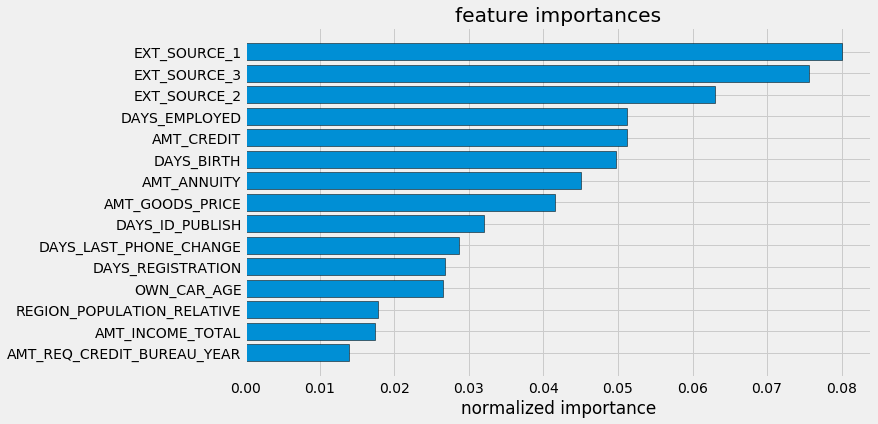

In [61]:
# ÌäπÏÑ± Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
fi_sorted = plot_feature_importances(fi)

In [62]:
# submission ÌååÏùº Ï†ÄÏû•
submission.to_csv('../data/baseline_lgb_2.csv', index=False)

LightGBM Î™®Îç∏ÏùÑ Ï†úÏ∂úÌïòÎ©¥ **0.735**Ïùò Ï†êÏàòÎ•º ÏñªÏùÑ Ïàò ÏûàÎã§.

### 6.1. With Engineered Features
ÎèÑÎ©îÏù∏ ÏßÄÏãù ÌîºÏ≤òÎ•º Ï∂îÍ∞ÄÌïòÍ≥† Î≤†Ïù¥Ïä§ÎùºÏù∏ Î™®Îç∏Í≥º ÏÑ±Îä•ÏùÑ ÎπÑÍµêÌï¥Î≥¥Ïûê.

In [63]:
app_train_domain['TARGET'] = train_labels

# Î™®Îç∏ ÌïôÏäµ Î∞è ÏòàÏ∏°
submission_domain, fi_domain, metrics_domain = model(app_train_domain, app_test_domain)
print('ÎèÑÎ©îÏù∏ ÏßÄÏãù ÌîºÏ≤òÎ•º Ï∂îÍ∞ÄÌïú Î≤†Ïù¥Ïä§ÎùºÏù∏ ÏßÄÌëú')
print(metrics_domain)

ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞ : (307511, 243)
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞ : (48744, 243)
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.804531	train's binary_logloss: 0.541661	valid's auc: 0.762577	valid's binary_logloss: 0.557281
Early stopping, best iteration is:
[237]	train's auc: 0.810671	train's binary_logloss: 0.535426	valid's auc: 0.762858	valid's binary_logloss: 0.553438
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.804304	train's binary_logloss: 0.542018	valid's auc: 0.765594	valid's binary_logloss: 0.55808
Early stopping, best iteration is:
[227]	train's auc: 0.808665	train's binary_logloss: 0.537574	valid's auc: 0.765861	valid's binary_logloss: 0.555268
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.803753	train's binary_logloss: 0.542936	valid's auc: 0.770139	valid's binary_logloss: 0.557892
[400]	train's auc: 0.834338	train's binary_logloss: 0.511693	valid's auc: 0.7

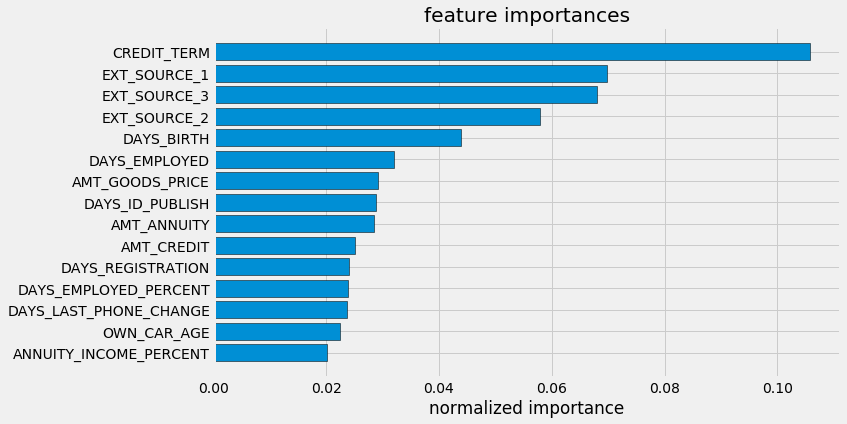

In [64]:
# ÌäπÏÑ± Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
fi_sorted = plot_feature_importances(fi_domain)

In [65]:
# submission ÌååÏùº Ï†ÄÏû•
submission_domain.to_csv('../data/baseline_lgb_domain_features_2.csv', index=False)

Ïù¥ Î™®Îç∏ÏùÄ ÏïΩ **0.754**Ïùò Ï†êÏàòÎ•º Í∞ñÎäîÎã§. ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ÏóêÏÑú Ïì∏Î™®Í∞Ä ÏóÜÎçò ÎèÑÎ©îÏù∏ ÏßÄÏãù ÌîºÏ≤ò(Domain Knowledge Feature)Í∞Ä Ïì∏Î™®Í∞Ä ÏûàÏùåÏùÑ Î≥º Ïàò ÏûàÎã§!